In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [64]:
model = pd.read_excel("NASH-Model-modified 23dec23.xlsx")

In [65]:
model.head(10)

,SL No,EARLY NASH,NASH AT RISK,ADV FIBR,APRI,FIB4,fibrosis cat,Fibrosis score,steatosis cat,Steatosis score,...,Serum GGT,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH
0,2,2,1,2,0.556818,1.703839,2,2,2,3,...,55.0,22.2,0.76,5.5,186.0,128.0,36.1,127.3,17.7,1.53
1,3,2,1,2,0.913174,0.855520,2,2,2,2,...,41.0,28.0,0.71,6.2,211.0,200.0,33.4,155.8,1.3,NaN
2,7,2,1,2,0.868852,2.278979,2,2,2,2,...,30.0,25.0,0.49,6.8,196.0,254.0,19.6,114.1,1.5,3.50
3,8,1,2,2,0.978723,1.442698,1,1,2,3,...,54.0,16.0,0.64,5.8,162.0,87.0,36.2,101.1,4,NaN
4,10,1,2,2,0.466667,0.825526,1,0,1,1,...,12.0,22.0,0.70,6.4,165.0,160.0,26.1,107.9,NaN,3.47
5,12,2,1,2,0.428994,0.658372,2,2,1,1,...,150.0,15.0,0.49,3.9,NaN,NaN,NaN,NaN,NaN,NaN
6,13,1,2,2,0.863636,0.838732,1,1,1,1,...,24.0,16.8,0.67,5.1,185.0,157.0,34.9,141.1,2,1.34
7,14,1,2,2,0.863636,0.838732,1,1,2,3,...,24.0,16.8,0.67,5.1,185.0,157.0,34.9,141.1,2,1.34
8,15,2,2,1,0.468037,0.666200,2,3,2,2,...,22.0,26.0,0.84,7.3,232.0,251.0,31.8,139.6,12.8,6.09
9,16,2,1,2,1.541667,2.289258,2,2,2,3,...,36.0,NaN,0.78,6.0,131.0,146.0,28.3,97.8,1.2,NaN


In [66]:
model.isnull().sum()

SL No                              0
EARLY NASH                         0
NASH AT RISK                       0
ADV FIBR                           0
APRI                             484
FIB4                             484
fibrosis cat                       0
Fibrosis score                     0
steatosis cat                      0
Steatosis score                    0
balloning cat                      0
Ballooning degeneration score      0
lob infl cat                       1
Lob. Inflm score                   1
Age                                0
Gender                             0
Wt                               109
BMI                              466
DM                               456
DYSLIPIDE                        466
WEIGHT                           466
HB                                27
TLC                               29
PLT                               23
NLR                              488
Albumin                            2
Serum Alkaline Phosphatase         3
S

In [67]:

# model=model['APRI'].fillna(model['APRI'].mean())
# model['FIB4'].fillna(model['FIB4'].mean(),inplace=True)
# model=model['Wt'].fillna(model['Wt'].mean())
# model=model['BMI'].fillna(model['BMI'].mean())
# model=model['DM'].fillna(model['DM'].mean())
# model=model['DYSLIPIDE'].fillna(model['DYSLIPIDE'].mean())
# model=model['WEIGHT'].fillna(model['WEIGHT'].mean())
# model=model['HB'].fillna(model['HB'].mean())
# model=model['TLC'].fillna(model['TLC'].mean())
# model=model['PLT'].fillna(model['PLT'].mean())
# model=model['NLR'] = pd.to_numeric(model['NLR'], errors='coerce')
# model=model['NLR'].fillna(model['NLR'].mean())
# model=model['Albumin'].fillna(model['Albumin'].mean())
# model=model['Serum Alkaline Phosphatase'].fillna(model['Serum Alkaline Phosphatase'].mean())
# model=model['Serum Bilirubin Direct'].fillna(model['Serum Bilirubin Direct'].mean())
# model=model['Serum Bilirubin Indirect'].fillna(model['Serum Bilirubin Indirect'].mean())
# model=model['Serum HDL  Cholesterol'].fillna(model['Serum HDL  Cholesterol'].mean())
# model=model['Serum LDL Cholesterol'].fillna(model['Serum LDL Cholesterol'].mean())
# model=model['TNF Alpha'] = pd.to_numeric(model['TNF Alpha'], errors='coerce')
# model=model['TNF Alpha'].fillna(model['TNF Alpha'].mean())
# model=model['TSH'].fillna(model['TSH'].mean())
# model=model['Lob. Inflm score'].fillna(model['Lob. Inflm score'].mean())
# model=model['Serum ALT /SGPT'].fillna(model['Serum ALT /SGPT'].mean())
# model=model['Serum AST/SGOT'].fillna(model['Serum AST/SGOT'].mean())
# model=model['lob infl cat'].fillna(model['lob infl cat'].mean())

columns_to_fill = ['APRI', 'FIB4', 'Wt', 'BMI', 'DM', 'DYSLIPIDE','WEIGHT','HB','TLC','PLT','NLR','Albumin','Serum Alkaline Phosphatase','Serum Bilirubin Direct','Serum Bilirubin Indirect','Serum HDL  Cholesterol','Serum LDL Cholesterol','TNF Alpha','TSH','Lob. Inflm score','Serum ALT /SGPT','Serum AST/SGOT','lob infl cat','Serum GGT','Serum Urea','Serum Creatinine','Serum Uric Acid','Serum Cholesterol','Serum Triglycerides','Serum Bilirubin Total']

for column in columns_to_fill:
    model[column] = pd.to_numeric(model[column], errors='coerce')
    # model[column].fillna(model[column].median(), inplace=True)


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(model)
impute_trans = imputer.transform(model)
model = pd.DataFrame(impute_trans, columns=model.columns)




















C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [68]:
model.isnull().sum()



SL No                            0
EARLY NASH                       0
NASH AT RISK                     0
ADV FIBR                         0
APRI                             0
FIB4                             0
fibrosis cat                     0
Fibrosis score                   0
steatosis cat                    0
Steatosis score                  0
balloning cat                    0
Ballooning degeneration score    0
lob infl cat                     0
Lob. Inflm score                 0
Age                              0
Gender                           0
Wt                               0
BMI                              0
DM                               0
DYSLIPIDE                        0
WEIGHT                           0
HB                               0
TLC                              0
PLT                              0
NLR                              0
Albumin                          0
Serum Alkaline Phosphatase       0
Serum ALT /SGPT                  0
Serum AST/SGOT      

In [69]:
model.keys()

Index(['SL No', 'EARLY NASH', 'NASH AT RISK', 'ADV FIBR', 'APRI', 'FIB4',
       'fibrosis cat', 'Fibrosis score', 'steatosis cat', 'Steatosis score',
       'balloning cat', 'Ballooning degeneration score', 'lob infl cat',
       'Lob. Inflm score', 'Age', 'Gender', 'Wt', 'BMI', 'DM', 'DYSLIPIDE',
       'WEIGHT', 'HB', 'TLC', 'PLT', 'NLR', 'Albumin',
       'Serum Alkaline Phosphatase', 'Serum ALT /SGPT', 'Serum AST/SGOT',
       'Serum Bilirubin Direct', 'Serum Bilirubin Indirect',
       'Serum Bilirubin Total', 'Serum GGT', 'Serum Urea', 'Serum Creatinine',
       'Serum Uric Acid', 'Serum Cholesterol', 'Serum Triglycerides',
       'Serum HDL  Cholesterol', 'Serum LDL Cholesterol', 'TNF Alpha', 'TSH'],
      dtype='object')

In [70]:
model=model.drop(['SL No','fibrosis cat','steatosis cat','balloning cat','lob infl cat'],axis=1)

In [71]:
model.head(5)


,EARLY NASH,NASH AT RISK,ADV FIBR,APRI,FIB4,Fibrosis score,Steatosis score,Ballooning degeneration score,Lob. Inflm score,Age,...,Serum GGT,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH
0,2.0,1.0,2.0,0.556818,1.703839,2.0,3.0,3.0,2.0,53.0,...,55.0,22.2,0.76,5.5,186.0,128.0,36.1,127.3,17.700000,1.530000
1,2.0,1.0,2.0,0.913174,0.855520,2.0,2.0,2.0,2.0,24.0,...,41.0,28.0,0.71,6.2,211.0,200.0,33.4,155.8,1.300000,1.034053
2,2.0,1.0,2.0,0.868852,2.278979,2.0,2.0,1.0,2.0,45.0,...,30.0,25.0,0.49,6.8,196.0,254.0,19.6,114.1,1.500000,3.500000
3,1.0,2.0,2.0,0.978723,1.442698,1.0,3.0,2.0,3.0,39.0,...,54.0,16.0,0.64,5.8,162.0,87.0,36.2,101.1,4.000000,1.916779
4,1.0,2.0,2.0,0.466667,0.825526,0.0,1.0,0.0,1.0,29.0,...,12.0,22.0,0.70,6.4,165.0,160.0,26.1,107.9,10.780294,3.470000


In [72]:
y=model[["EARLY NASH","NASH AT RISK","ADV FIBR"]]
# y=model[["EARLY NASH"]]


In [73]:
model=model.drop(['EARLY NASH','NASH AT RISK','ADV FIBR','APRI','FIB4'],axis=1)
# model=model.drop(['EARLY NASH'],axis=1)

model

,Fibrosis score,Steatosis score,Ballooning degeneration score,Lob. Inflm score,Age,Gender,Wt,BMI,DM,DYSLIPIDE,...,Serum GGT,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH
0,2.0,3.0,3.0,2.0,53.0,2.0,38.800000,14.251607,2.000000,1.000000,...,55.0,22.20,0.76,5.5,186.0,128.0,36.1,127.3,17.700000,1.530000
1,2.0,2.0,2.0,2.0,24.0,1.0,77.400000,14.351576,2.000000,1.000000,...,41.0,28.00,0.71,6.2,211.0,200.0,33.4,155.8,1.300000,1.034053
2,2.0,2.0,1.0,2.0,45.0,2.0,82.000000,15.023136,2.000000,1.000000,...,30.0,25.00,0.49,6.8,196.0,254.0,19.6,114.1,1.500000,3.500000
3,1.0,3.0,2.0,3.0,39.0,2.0,96.200000,15.118367,2.000000,1.000000,...,54.0,16.00,0.64,5.8,162.0,87.0,36.2,101.1,4.000000,1.916779
4,0.0,1.0,0.0,1.0,29.0,1.0,68.000000,15.432619,2.000000,1.000000,...,12.0,22.00,0.70,6.4,165.0,160.0,26.1,107.9,10.780294,3.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0.0,0.0,0.0,0.0,18.0,2.0,54.600000,38.367677,1.829340,1.243839,...,10.0,29.70,0.78,4.1,136.0,107.0,32.2,80.6,15.397561,3.134564
1317,0.0,0.0,0.0,0.0,18.0,1.0,81.706515,39.030325,1.875049,1.068326,...,28.0,31.30,0.83,7.9,166.0,122.0,32.1,114.3,15.653518,1.352429
1318,0.0,0.0,0.0,0.0,18.0,2.0,82.000000,39.134921,1.907935,1.409011,...,16.0,16.90,0.69,3.8,94.0,50.0,35.8,59.1,15.632080,2.548592
1319,0.0,0.0,0.0,0.0,18.0,2.0,75.183828,39.064387,1.889745,2.851149,...,45.0,23.60,0.69,6.0,238.0,61.0,82.3,148.0,15.489999,5.427626


In [74]:
model

,Fibrosis score,Steatosis score,Ballooning degeneration score,Lob. Inflm score,Age,Gender,Wt,BMI,DM,DYSLIPIDE,...,Serum GGT,Serum Urea,Serum Creatinine,Serum Uric Acid,Serum Cholesterol,Serum Triglycerides,Serum HDL Cholesterol,Serum LDL Cholesterol,TNF Alpha,TSH
0,2.0,3.0,3.0,2.0,53.0,2.0,38.800000,14.251607,2.000000,1.000000,...,55.0,22.20,0.76,5.5,186.0,128.0,36.1,127.3,17.700000,1.530000
1,2.0,2.0,2.0,2.0,24.0,1.0,77.400000,14.351576,2.000000,1.000000,...,41.0,28.00,0.71,6.2,211.0,200.0,33.4,155.8,1.300000,1.034053
2,2.0,2.0,1.0,2.0,45.0,2.0,82.000000,15.023136,2.000000,1.000000,...,30.0,25.00,0.49,6.8,196.0,254.0,19.6,114.1,1.500000,3.500000
3,1.0,3.0,2.0,3.0,39.0,2.0,96.200000,15.118367,2.000000,1.000000,...,54.0,16.00,0.64,5.8,162.0,87.0,36.2,101.1,4.000000,1.916779
4,0.0,1.0,0.0,1.0,29.0,1.0,68.000000,15.432619,2.000000,1.000000,...,12.0,22.00,0.70,6.4,165.0,160.0,26.1,107.9,10.780294,3.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0.0,0.0,0.0,0.0,18.0,2.0,54.600000,38.367677,1.829340,1.243839,...,10.0,29.70,0.78,4.1,136.0,107.0,32.2,80.6,15.397561,3.134564
1317,0.0,0.0,0.0,0.0,18.0,1.0,81.706515,39.030325,1.875049,1.068326,...,28.0,31.30,0.83,7.9,166.0,122.0,32.1,114.3,15.653518,1.352429
1318,0.0,0.0,0.0,0.0,18.0,2.0,82.000000,39.134921,1.907935,1.409011,...,16.0,16.90,0.69,3.8,94.0,50.0,35.8,59.1,15.632080,2.548592
1319,0.0,0.0,0.0,0.0,18.0,2.0,75.183828,39.064387,1.889745,2.851149,...,45.0,23.60,0.69,6.0,238.0,61.0,82.3,148.0,15.489999,5.427626


In [75]:
model.isnull().sum()

Fibrosis score                   0
Steatosis score                  0
Ballooning degeneration score    0
Lob. Inflm score                 0
Age                              0
Gender                           0
Wt                               0
BMI                              0
DM                               0
DYSLIPIDE                        0
WEIGHT                           0
HB                               0
TLC                              0
PLT                              0
NLR                              0
Albumin                          0
Serum Alkaline Phosphatase       0
Serum ALT /SGPT                  0
Serum AST/SGOT                   0
Serum Bilirubin Direct           0
Serum Bilirubin Indirect         0
Serum Bilirubin Total            0
Serum GGT                        0
Serum Urea                       0
Serum Creatinine                 0
Serum Uric Acid                  0
Serum Cholesterol                0
Serum Triglycerides              0
Serum HDL  Cholester

In [76]:
model.isnull().sum()

Fibrosis score                   0
Steatosis score                  0
Ballooning degeneration score    0
Lob. Inflm score                 0
Age                              0
Gender                           0
Wt                               0
BMI                              0
DM                               0
DYSLIPIDE                        0
WEIGHT                           0
HB                               0
TLC                              0
PLT                              0
NLR                              0
Albumin                          0
Serum Alkaline Phosphatase       0
Serum ALT /SGPT                  0
Serum AST/SGOT                   0
Serum Bilirubin Direct           0
Serum Bilirubin Indirect         0
Serum Bilirubin Total            0
Serum GGT                        0
Serum Urea                       0
Serum Creatinine                 0
Serum Uric Acid                  0
Serum Cholesterol                0
Serum Triglycerides              0
Serum HDL  Cholester

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(model, y,test_size=0.2)

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier( MLPClassifier(hidden_layer_sizes=(1000,100),
                    max_iter=1000, random_state=42))
clf.fit(Xtrain, ytrain)

MultiOutputClassifier(estimator=MLPClassifier(hidden_layer_sizes=(1000, 100),
                                              max_iter=1000, random_state=42))

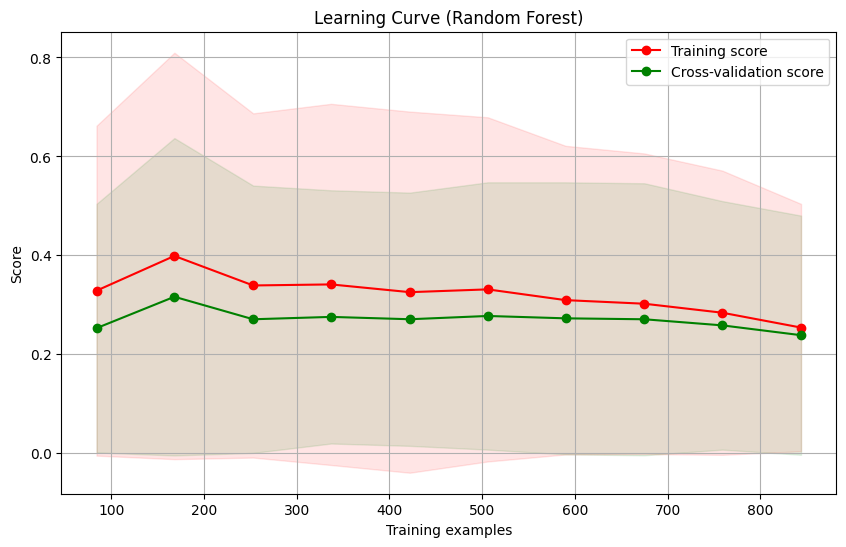

In [123]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(clf,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [79]:
clf.predict(Xtest)

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [2., 2., 1.],
       [2., 2., 1.],
       [1., 2., 2.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [1., 2., 2.],
       [1., 2., 2.],
       [2., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 1.],
       [2., 2., 1.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 1.],
       [2., 2., 1.],
       [0., 0., 0.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [1., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 1.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0

In [80]:
n_outputs = len(clf.estimators_)
print("Number of outputs:", n_outputs)


Number of outputs: 3


In [81]:
# from sklearn.metrics import roc_auc_score
# y_pred = clf.predict_proba(Xtest)
# y_pred = np.transpose([pred[:, 1] for pred in y_pred])
# roc_auc_score(ytest, y_pred, average=None)




In [82]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

In [83]:
new=MultiOutputClassifier(HistGradientBoostingClassifier())
new.fit(Xtrain,ytrain)


MultiOutputClassifier(estimator=HistGradientBoostingClassifier())

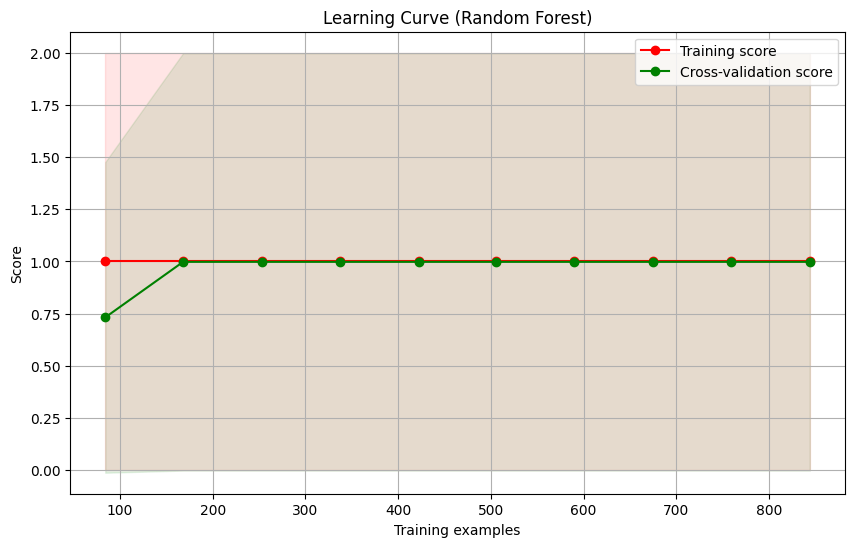

In [124]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(new,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [84]:
accuracy = round(new.score(Xtest, ytest)*100,2)
print(round(accuracy, 2), '%')

99.62 %


In [85]:


# predictions = new.predict(Xtest)
# accuracy = accuracy_score(predictions, ytest)
# print(f'Accuracy: {round(accuracy*100,2)}%')

In [86]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.multioutput import MultiOutputClassifier

In [87]:

multi_output_rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1))
multi_output_rf.fit(Xtrain,ytrain)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                       n_jobs=-1,
                                                       random_state=42))

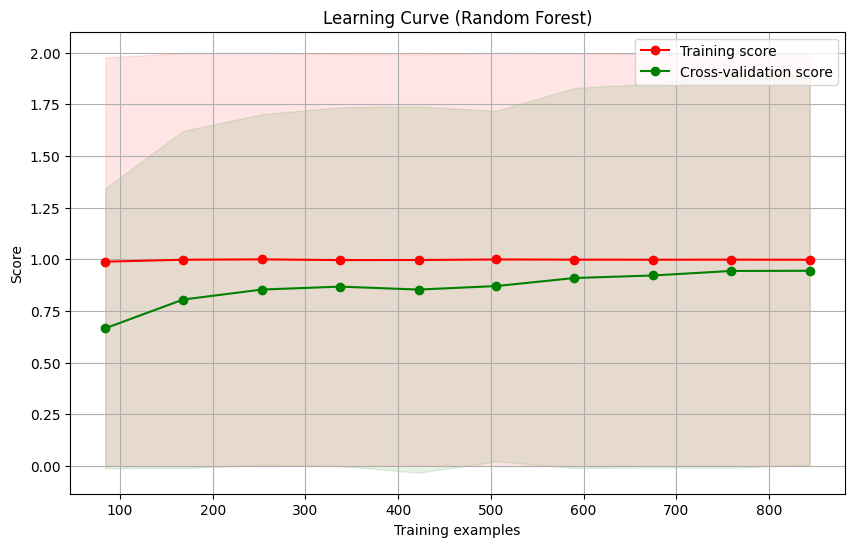

In [88]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(multi_output_rf,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()





In [89]:
y_pred= multi_output_rf.predict(Xtest)  
y_pred

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [2., 2., 1.],
       [2., 2., 1.],
       [1., 2., 2.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 1., 2.],
       [0., 0., 0.],
       [1., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [1., 2., 2.],
       [1., 2., 2.],
       [2., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 1.],
       [2., 2., 1.],
       [2., 1., 2.],
       [0., 0., 0.],
       [2., 1., 2.],
       [2., 1., 1.],
       [2., 1., 2.],
       [0., 0., 0.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 1., 2.],
       [2., 1., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 1., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 1., 2.],
       [2., 1., 1.],
       [1., 2., 2.],
       [2., 1., 2.],
       [2., 1., 2.],
       [2., 2., 1.],
       [2., 1., 2.],
       [0., 0., 0.],
       [0., 0

In [90]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming multi_output_rf is already fitted and Xtest, ytest are defined
# y_pred_proba = multi_output_rf.predict_proba(Xtest)
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(ytest.shape[1]):
#     # Use [:, 1] to get the probabilities of the positive class (class 1)
#     fpr[i], tpr[i], _ = roc_curve(ytest.iloc[:, i], y_pred_proba[i][:, 1])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# plt.figure(figsize=(10, 7))
# for i in range(ytest.shape[1]):
#     plt.plot(fpr[i], tpr[i], label=f'Output {i + 1} (AUC = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Multi-Output RandomForestClassifier')
# plt.legend()
# plt.show()


In [91]:
random_model_accuracy = round(multi_output_rf.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy, 2), '%')

95.09 %


In [92]:
# result_file=pd.DataFrame(y_pred,columns=["EARLY NASH_pred", "NASH AT RISK", "ADV FIBR"])
# result_file.to_csv('predictions.csv', index=True)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
case1 = MultiOutputClassifier(LogisticRegression(random_state=42))
case1.fit(Xtrain, ytrain)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

MultiOutputClassifier(estimator=LogisticRegression(random_state=42))

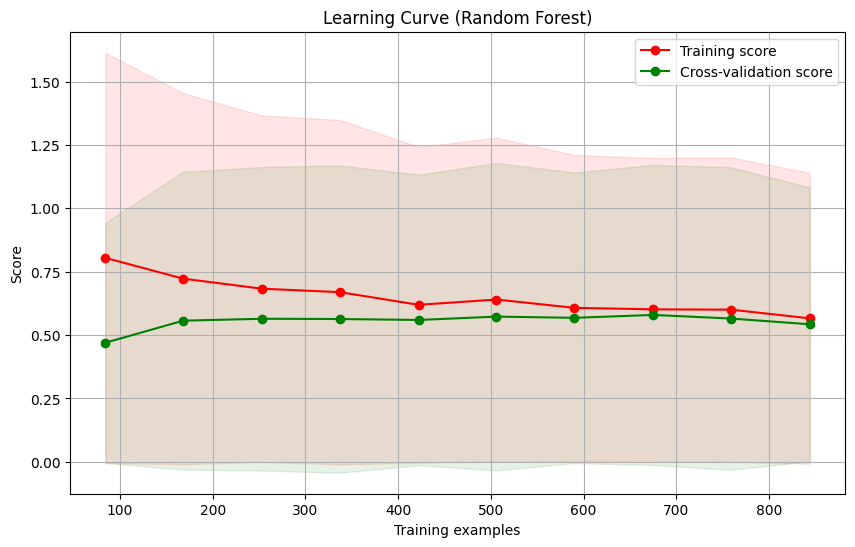

In [129]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(case1,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [96]:
y_pred = case1.predict(Xtest)


In [97]:
y_pred

array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [1., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [1., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [2., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 1.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [2., 2., 2.],
       [1., 2., 2.],
       [2., 2., 2.],
       [2., 2., 1.],
       [2., 2., 1.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0

In [98]:
random_model_accuracy2 = round(case1.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

64.91 %


In [99]:
from sklearn.linear_model import LinearRegression


In [100]:
case2=LinearRegression()
case2.fit(Xtrain, ytrain)


LinearRegression()

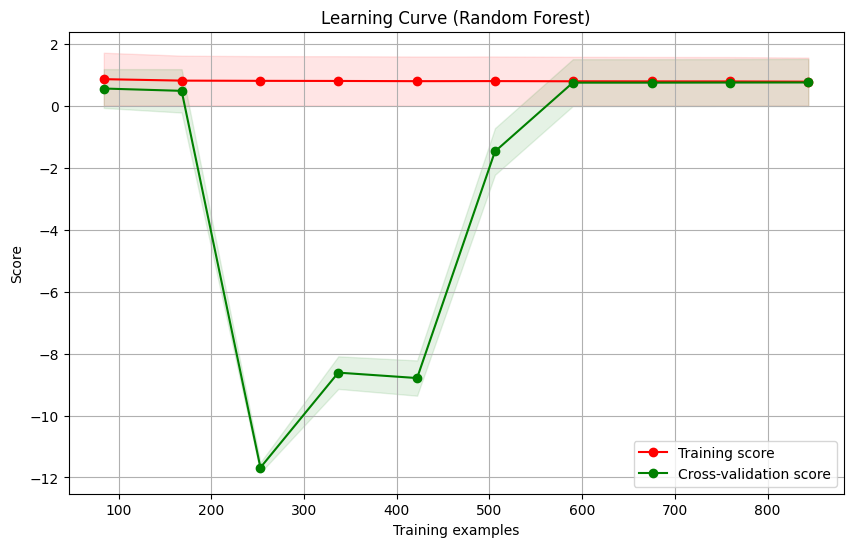

In [119]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(case2,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [101]:
y_pred1 = case2.predict(Xtest)

In [102]:
y_pred1

array([[ 2.03428832e-01,  3.80107714e-01,  4.89468111e-01],
       [ 1.21382830e-01,  3.19679407e-01,  3.01357849e-01],
       [ 9.84116686e-01,  2.25674610e+00,  2.81776533e+00],
       [ 1.96791801e+00,  1.31525080e+00,  7.96664198e-01],
       [ 1.99893111e+00,  1.50050744e+00,  1.11578614e+00],
       [ 7.59320812e-01,  1.53820235e+00,  1.98494589e+00],
       [ 2.32052023e+00,  1.91207194e+00,  1.70509078e+00],
       [ 4.46805668e-02,  1.71528150e-01,  1.90886812e-01],
       [ 2.06609815e-01,  4.57959916e-01,  4.82944609e-01],
       [ 1.06900254e-01,  3.37002211e-01,  3.18877540e-01],
       [ 1.76639619e+00,  1.95538059e+00,  1.90053193e+00],
       [ 8.55439204e-02,  2.34309315e-01,  2.37300739e-01],
       [ 1.11301885e+00,  1.52896302e+00,  1.63036817e+00],
       [ 1.19997891e+00,  1.56540327e+00,  1.72329088e+00],
       [ 6.28067018e-02,  2.63219387e-01,  2.19649515e-01],
       [ 2.15021267e+00,  1.66313504e+00,  1.32937689e+00],
       [ 1.36680020e+00,  1.73549049e+00

In [103]:
random_model_accuracy3 = round(case2.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy3, 2), '%')

80.67 %


In [104]:
# result_linear=pd.DataFrame(y_pred1,columns=["EARLY NASH_pred", "NASH AT RISK", "ADV FIBR"])
# result_file.to_csv('predictions_Linear.csv', index=False)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
case3 = MultiOutputClassifier(KNeighborsClassifier())
case3.fit(Xtrain, ytrain)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [107]:
y_pred2 = case3.predict(Xtest)

In [108]:
y_pred2

array([[2., 1., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [2., 2., 2.],
       [2., 1., 2.],
       [1., 2., 2.],
       [2., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [1., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [1., 2., 2.],
       [2., 0., 0.],
       [1., 2., 2.],
       [0., 2., 0.],
       [2., 2., 1.],
       [2., 2., 1.],
       [0., 0., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 2., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 0., 0.],
       [1., 2., 2.],
       [1., 1., 2.],
       [0., 0., 0.],
       [2., 2., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 1., 2.],
       [0., 0., 2.],
       [0., 2., 0.],
       [2., 2., 1.],
       [1., 2., 2.],
       [1., 2., 2.],
       [0., 0., 0.],
       [2., 2

In [109]:
random_model_accuracy4 = round(case3.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy4, 2), '%')

36.6 %


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
case5= MultiOutputClassifier(GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=42))

In [112]:
case5.fit(Xtrain, ytrain)

MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           n_estimators=10,
                                                           random_state=42))

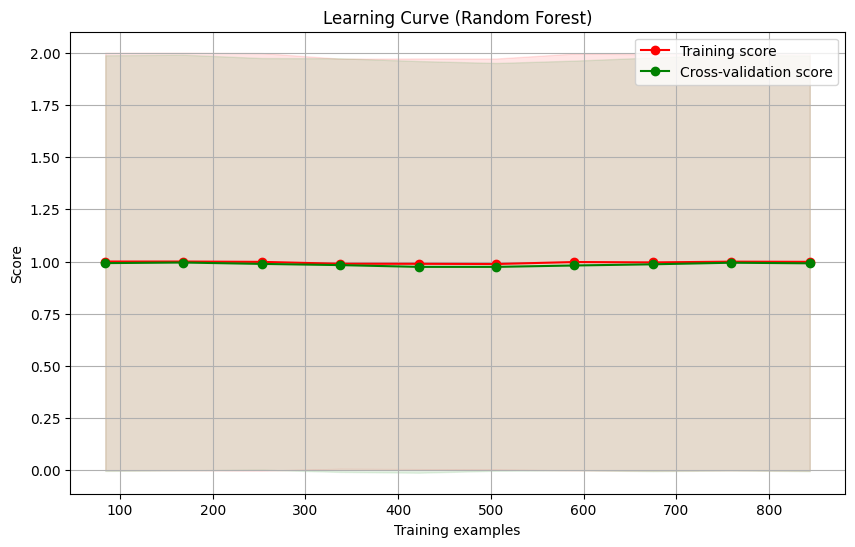

In [120]:
import matplotlib .pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(case5,Xtrain,ytrain,cv=5,n_jobs=-1,train_sizes=np.linspace(0.1,1,10))
train_score_mean=np.mean(train_scores,axis=1)
train_score_median=np.median(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)
test_score_median=np.median(test_scores,axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_score_mean - train_score_median,
                 train_score_mean + train_score_median, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_score_mean - test_score_median,
                 test_score_mean + test_score_median, alpha=0.1, color="g")
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve (Random Forest)")
plt.grid()
plt.show()

In [113]:
random_model_accuracy6= round(case5.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy6, 2), '%')

98.49 %


In [114]:
from sklearn import svm

In [115]:
clf = MultiOutputClassifier(svm.SVC())
clf.fit(Xtrain, ytrain)


MultiOutputClassifier(estimator=SVC())

In [116]:
pre=clf.predict(Xtest)
pre

array([[2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 2., 2.],
       [2., 2., 0.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [0., 0., 2.],
       [2., 2

In [117]:
random_model_accuracy7= round(clf.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy7, 2), '%')

24.91 %


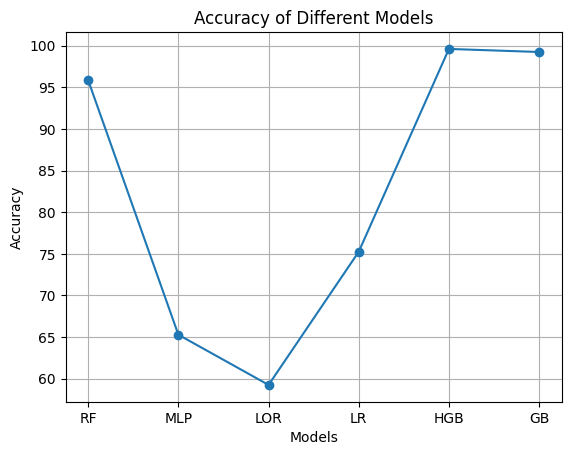

In [118]:
        import matplotlib.pyplot as plt

        models = ['RF','MLP','LOR','LR','HGB','GB']
        accuracy_values = [95.85, 65.28 , 59.25 , 75.25  ,99.62,99.25 ]

        plt.plot(models, accuracy_values, marker='o', linestyle='-')

        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of Different Models')

        plt.grid(True)
        # plt.legend(['Accuracy'])
        plt.show()